
# Projeto Final - Visualização de Dados (Cristie)

**Aluna:** A. Cristiane R. Lima (Cristie)

**Base de Dados:** Salaries for Data Science Jobs -> **Link:** https://www.kaggle.com/datasets/adilshamim8/salaries-for-data-science-jobs

**Objetivo principal:** Explorar visualmente os dados relacionados aos salários em carreiras de Ciência de Dados, usando diferentes tipos de gráficos de acordo com as quatro categorias principais: Comparação, Composição, Distribuição e Relação

**Objetivos secundários:** 
  - Fazer uma breve descrição de cada problema
  - Justificar a escolha do tipo de visualização

**Ferramentas utilizadas**: Seaborn, Matplotlib, Plotly

---

**About Dataset**

This dataset captures real-world salary data for jobs in Data Science, Artificial Intelligence, and Machine Learning from 2020 to 2025. Each row represents a reported salary, enriched with attributes like job title, experience level, company size, remote work ratio, and geographic context. This data is valuable for analyzing salary trends over time, comparing roles across countries, and exploring compensation based on experience, work setting, and more.

**Column Descriptions:** 

_- work_year:_ The year the salary was reported. Covers salaries from 2020 through 2025.

_- experience_level:_ The seniority level of the employee at the time of reporting:
	
	EN: Entry-level / Junior
	
	MI: Mid-level / Intermediate
	
	SE: Senior-level
	
	EX: Executive / Director
	
_- employment_type:_ The type of employment contract:
	
	FT: Full-time
	
	PT: Part-time
	
	CT: Contract
	
	FL: Freelance
	
_- job_title:_ The employee’s specific job title (e.g., Data Scientist, ML Engineer, AI Specialist, Research Scientist).

_- salary:_ The employee's gross annual salary in the original reported currency, before taxes and deductions.

_- salary_currency:_ The currency in which the salary was originally paid (e.g., USD, EUR, INR).

_- salary_in_usd:_ The employee's salary converted into USD using 2025 exchange rates for standardized comparison.

_- employee_residence:_ The country (ISO 3166-1 alpha-2 code) where the employee resides. This may differ from the company location, especially in remote roles.

_- remote_ratio:_ Indicates the percentage of remote work:
	
	0: No remote work (On-site)
	
	50: Hybrid (partially remote)
	
	100: Fully remote
	
_- company_location:_ The country (ISO 3166-1 alpha-2 code) where the company or employer is headquartered.

_- company_size:_ The size of the employing organization:
	
	S: Small (1–50 employees)
	
	M: Medium (51–500 employees)
	
	L: Large (501+ employees)

In [1]:
!pip install openpyxl
!pip install pycountry


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pycountry

# Configurações de estilo
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (5, 3) # Para gráfico melhor, plt.rcParams["figure.figsize"] = (10, 6)



In [3]:
# Passo 1: Verificando em que kernel o Jupyter está executando pois deu problema no import do pycountry_convert
import sys
print(sys.executable)

C:\Anaconda3\python.exe


In [4]:
!{sys.executable} -m pip install pycountry-convert
#!pip install pycountry-convert
import pycountry_convert as pcc

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Anaconda3\python.exe -m pip install --upgrade pip


## Gerando Dataframe para os Dados Brutos

In [5]:
# Dados brutos
file = "salaries.csv"
df = pd.read_csv(file)
print('df.shape =',df.shape)
df.head(1)


df.shape = (141566, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M


## Gerando Dataframes com a média salarial por ano e continente e incluindo, no Dataframe original, as colunas do Continente do Empregado e do Empregador

In [6]:
# Novos DataFrames com a média salarial por ano e continente e incluindo, no Dataframe original as colunas do Continente do Empregado e do Empregador

# Função para converter código de país → continente ((ex: 'BR' → South America))
def country_to_continent(country_code):
    try:
        country_alpha2 = country_code.upper()
        continent_code = pcc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = {
            'AF': 'Africa',
            'AS': 'Asia',
            'EU': 'Europe',
            'NA': 'North America',
            'SA': 'South America',
            'OC': 'Oceania'
        }
        return continent_name.get(continent_code, 'Unknown')
    except:
        return 'Unknown'

# Aplicando o mapeamento e criando novas colunas no DataFrame original
df['employee_continent'] = df['employee_residence'].apply(country_to_continent)
df['company_continent'] = df['company_location'].apply(country_to_continent)

# Criando 2 novos DataFrames com a média salarial, ano e continente agrupando por ano e continente
# Continente do Empregado
df_employee_region = df.groupby(['work_year', 'employee_continent'])['salary_in_usd'].mean().reset_index()
# Continente do Empregado (Companhia)
df_company_region = df.groupby(['work_year', 'company_continent'])['salary_in_usd'].mean().reset_index()

# Verificando as primeiras linhas
print(df_employee_region.head())
print(df_company_region.head())
print('df.shape =',df.shape)
df.head(2)


   work_year employee_continent  salary_in_usd
0       2020             Africa   58333.333333
1       2020               Asia   92945.333333
2       2020             Europe   63643.181818
3       2020      North America  147216.187500
4       2020            Oceania  125000.000000
   work_year company_continent  salary_in_usd
0       2020            Africa   80000.000000
1       2020              Asia  114292.500000
2       2020            Europe   61324.633333
3       2020     North America  133865.947368
4       2020           Oceania  125000.000000
df.shape = (141566, 13)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_continent,company_continent
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M,Europe,Europe
1,2025,EN,FT,Data Quality Analyst,48000,GBP,60759,GB,0,GB,M,Europe,Europe


## Gerando Dataframes para nível de experiência executiva (EX) e experiência operacional (EN, MI, SE)

EN: Entry-level / Junior

MI: Mid-level / Intermediate

SE: Senior-level / Senior

EX: Executive / Director

In [7]:
# Filtro Salário Médio de Cargos Operacionais
df2 = df_nonEX = df[df['experience_level']!='EX']

# Filtro Salário Médio de Cargos Executivos
df3 = df_EX = df[df['experience_level']=='EX']

# Refazendo novos DataFrames com a média salarial por ano e continenteAgrupando por ano e continente
df2_employee_region = df2.groupby(['work_year', 'employee_continent'])['salary_in_usd'].mean().reset_index()
df2_company_region = df2.groupby(['work_year', 'company_continent'])['salary_in_usd'].mean().reset_index()

# Verificando as primeiras linhas
print(df2_employee_region.head())
print(df2_company_region.head())
print('df2.shape =',df2.shape)
df2.head(1)

   work_year employee_continent  salary_in_usd
0       2020             Africa   80000.000000
1       2020               Asia   92945.333333
2       2020             Europe   63137.250000
3       2020      North America  136197.266667
4       2020            Oceania  125000.000000
   work_year company_continent  salary_in_usd
0       2020            Africa   80000.000000
1       2020              Asia  114292.500000
2       2020            Europe   60686.413793
3       2020     North America  127054.457143
4       2020           Oceania  125000.000000
df2.shape = (137997, 13)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_continent,company_continent
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M,Europe,Europe


## Distribuição: Line/Column Histogram –Salários em USD para cargos em Ciência de Dados
**Definição do problema:** Analisar a distribuição dos salários em USD para cargos em Ciência de Dados.
  
  **Justificativa:** Distribuição estática de variável única com muitos itens
  
  **Observações:** Altos salários mas a maioria dos profissionais permanece em faixas medianas.

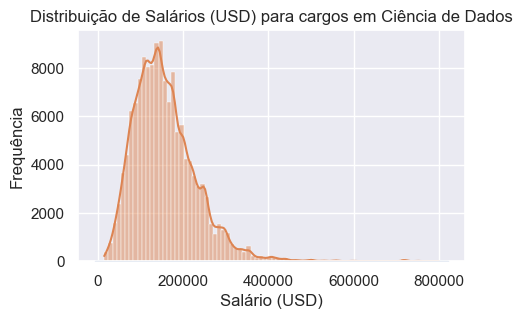

In [8]:
sns.kdeplot(data=df, x='salary_in_usd', fill=True)
sns.histplot(data=df, x='salary_in_usd', bins=80, kde=True)
plt.title("Distribuição de Salários (USD) para cargos em Ciência de Dados")
plt.xlabel("Salário (USD)")
plt.ylabel("Frequência")
#plt.grid(True)
plt.show()

## Comparação: Line Chart – Salários Médios por Ano

  **Definição do problema:** Avaliar sálarios médios, ano a ano, dos anos de 2020 a 2025, comparando-o com a média para os cargos operacionais e executivos


  **Justificativa:** Comparação ao longo do tempo; séries razoáveis; dados não cíclicos.
  
  **Observações:** 
  - Apesar de todas as categorias apresentarem subida na média ao longo dos anos, nota-se que houve uma leve queda de 2020 para 2021 para os cargos operacionais (Pandemia?) seguida de uma subida significativa até 2023, sendo suavizada a partir de 2024; enquanto que nos cargos executivos foi suave durante todo o período
  - A média salarial nos cargos executivos se mostra bem mais alta com destaque para a grande lacuna em 2020 e 2021 e para um notável estreitamento nos períodos posteriores
  - Apesar de a média nos cargos executivos ser discrepante dos demais, percebe-se que ela não afeta o total; portanto podem-se manter todos os cargos para análise posterior

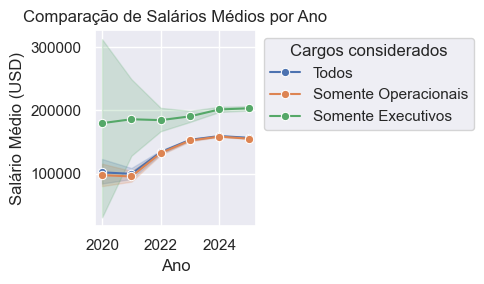

In [9]:
sns.lineplot(data=df, x='work_year', y='salary_in_usd', marker='o', label='Todos')

sns.lineplot(data=df2, x='work_year', y='salary_in_usd', marker='o', label='Somente Operacionais')

sns.lineplot(data=df3, x='work_year', y='salary_in_usd', marker='o', label='Somente Executivos')

plt.title("Comparação de Salários Médios por Ano")
plt.xlabel("Ano")
plt.ylabel("Salário Médio (USD)")
plt.legend(title="Cargos considerados", bbox_to_anchor=(1,1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Comparação: Column Chart – Salários (USD) por Nível de Experiência

  **Definição do problema:** Avaliar salários por nível de experiência entre cargos operacionais e executivos.

  **Justificativa:** Comparação de dados estáticos; duas variáveis.
  
  **Observações:** 
  - Apesar de a média salarial ano a ano ter apresentado superioridade para os cargos executivos em relação aos operacionais, nota-se que 
  
  - A média salarial nos cargos executivos se mostra bem mais alta com destaque para a grande lacuna em 2020 e 2021 e para um notável estreitamento nos períodos posteriores


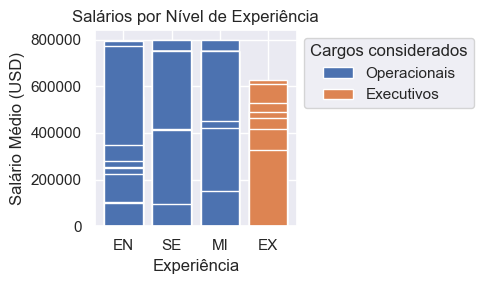

In [10]:
#exp_group = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

plt.bar(df2['experience_level'], df2['salary_in_usd'], label='Operacionais')
plt.bar(df3['experience_level'], df3['salary_in_usd'], label='Executivos')

plt.title("Salários por Nível de Experiência")
plt.xlabel("Experiência")
plt.ylabel("Salário Médio (USD)")

plt.legend(title="Cargos considerados", bbox_to_anchor=(1,1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
df3.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_continent,company_continent
66,2025,EX,FT,Director,224500,USD,224500,US,100,US,M,North America,North America


## Composição: Stacked Area Chart – Salário Médio por Continente ao Longo do Tempo
  **Definição do problema:** Como visualizar a evolução do salário médio global por continente e entender como cada região contribui para essa evolução ao longo do tempo
  
  **Justificativa:** Avaliar a contribuição de cada continente na composição total do salário médio durante o período
  
  **Observações:** 
  - Tendência geral dos salários ao longo do tempo: _North América_ estável, _Oceania_ com alguns altos e baixos
  - Participação relativa de cada continente no total: _South America_ irrelevante em 2020 e estável pós-crescimento a partir de 2022
  - Comparação visual simultânea entre regiões e tempo: _North América_ sempre à frente e _South América_ menos contribui


## Composição: Stacked Area Chart – Salário Médio por Continente do Empregado ao Longo do Tempo


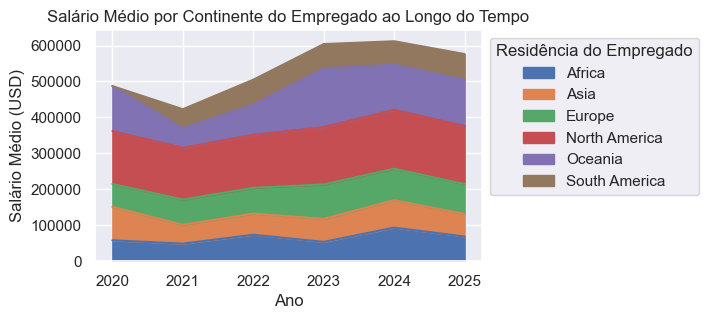

In [12]:
area_data = df_employee_region.groupby(['work_year', 'employee_continent'])['salary_in_usd'].mean().unstack().fillna(0)
area_data.plot.area()
plt.title("Salário Médio por Continente do Empregado ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Salário Médio (USD)")
plt.legend(title="Residência do Empregado", loc='upper left', bbox_to_anchor=(1,1))
#plt.tight_layout()
plt.show()


In [13]:
# Verificando as primeiras linhas do dataframe
print(df_employee_region.head())
#print('df_employee_region.shape =',df_employee_region.shape)
#print(df_company_region.head())
#print('', df_company_region.shape)

   work_year employee_continent  salary_in_usd
0       2020             Africa   58333.333333
1       2020               Asia   92945.333333
2       2020             Europe   63643.181818
3       2020      North America  147216.187500
4       2020            Oceania  125000.000000


## Composição: Stacked Area Chart – Salário Médio por Continente da Companhia Empregadora ao Longo do Tempo

In [14]:
# Verificando as primeiras linhas do dataframe
print(df_company_region.head())


   work_year company_continent  salary_in_usd
0       2020            Africa   80000.000000
1       2020              Asia  114292.500000
2       2020            Europe   61324.633333
3       2020     North America  133865.947368
4       2020           Oceania  125000.000000


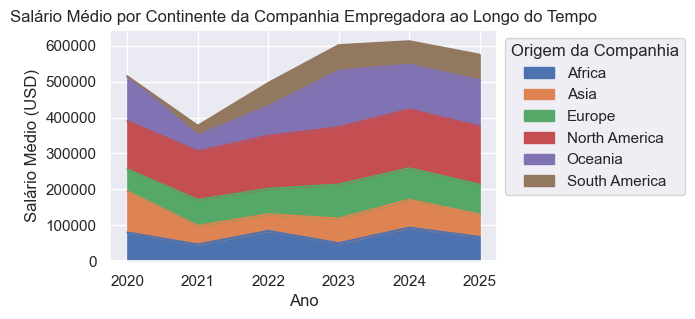

In [15]:

area_data = df_company_region.groupby(['work_year', 'company_continent'])['salary_in_usd'].mean().unstack().fillna(0)
area_data.plot.area()
plt.title("Salário Médio por Continente da Companhia Empregadora ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Salário Médio (USD)")
plt.legend(title="Origem da Companhia", loc='upper left', bbox_to_anchor=(1,1))
#plt.tight_layout()
plt.show()


## Relação: Bubble Chart – Salário vs Nível de Experiência com Tamanho da Empresa na Bolha
  **Definição do problema:** Explorar relação entre salário e experiência, considerando o porte da empresa.
  
  **Justificativa:** Três variáveis; relação e magnitude visual.
  
  **Observações:** 
  - O gráfico mostra que salários crescem com a experiência, mas variam amplamente dentro de cada nível.
  - Empresas de porte médio dominam os salários mais altos, enquanto empresas pequenas têm menor impacto salarial.
  - Há sobreposição significativa entre níveis e portes, sugerindo forte influência de variáveis adicionais.

In [ ]:
df['size_num'] = df['company_size'].map({'S':1, 'M':2, 'L':3})
fig = px.scatter(df, y='experience_level', x='salary_in_usd',
                 size='size_num', color='company_size',
                 hover_data=['job_title', 'company_location'])
fig.update_layout(title="Relação:Salário vs Nível de Experiência com Tamanho da Empresa na Bolha")
fig.show()


## Gráficos em rascunho...
**...a explorar, corrigir e/ou melhorar visualização!!!**

## Distribuição: Mapa Coroplético – Salário vs Nível de Experiência com Tamanho da Empresa na Bolha

In [ ]:
#binimport plotly.express as px
#import pycountry

df.columns = df.columns.str.lower().str.strip()

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code.upper()).alpha_3
    except:
        return None

# Criar nova coluna com códigos ISO-3
df["country_iso3"] = df["employee_residence"].apply(iso2_to_iso3)

# Remover países inválidos
df_valid = df.dropna(subset=["country_iso3"])

# Agrupar por país e calcular salário médio
df_country = df_valid.groupby("country_iso3")["salary_in_usd"].mean().reset_index()
df_country.columns = ["country", "avg_salary_usd"]

# Criar o mapa coroplético
fig = px.choropleth(
    df_country,
    locations="country",
    locationmode="ISO-3",
    color="avg_salary_usd",
    color_continuous_scale="Viridis",
    title="Salário Médio por País (USD)",
    labels={"avg_salary_usd": "Salário Médio (USD)"}
)

#fig.update_layout(
#    geo=dict(showframe=True, showcoastlines=False),
#    title_x=0.3
#)

fig.update_layout(

    geo=dict(showframe=True, showcoastlines=False),
    title_x=0.3,
    width=1000,  # Largura do mapa
    height=800,  # Altura do mapa
    margin={"r": 0, "t": 50, "l": 0, "b": 0},  # Margens
    coloraxis_colorbar=dict(
        title="Salário Médio (USD)",
        title_font_size=16,
        tickfont=dict(size=14),  # Tamanho dos números da escala
        lenmode="pixels", len=300,  # Aumenta a barra de legenda
        thickness=20  # Espessura da barra de legenda
    )
)
fig.show()

## **[Não considerar esta seção nos slides]**
## Comparação: Column Chart – Salário por Nível de Experiênca

**Código com erro:** Estou com problema para adaptar o código apresentado na aula 2

In [ ]:
barWidth = 0.18
x_pos = bar = []
# Ordenando por ano
#df2.work_year.value_counts().sort_index().plot()
anos = df2['work_year'].unique()
niveis_exp = df2['experience_level'].unique()

for i, experience_level in enumerate(niveis_exp):
    bar=df2[df2['experience_level']==experience_level]['salary_in_usd'].values
    if i==0:
        x_pos=np.arange(len(bar))
    else:
        x_pos=[x+barWidth for x in x_pos]
    plt.bar(x_pos,bar, width=barWidth, label=experience_level)
plt.xticks([r+barWidth for r in range(len(anos))], anos)
plt.xticks(rotation=45)
plt.margins(0,0)
plt.title('Vendas do último trimestre - Top 5 países')
plt.ylabel('Quantidade de vendas')
plt.legend()
plt.show()


## Comparação: Tabela com Métricas – Salário Médio e Total por País de Origem da Companhia

In [ ]:
region_summary = df.groupby('company_location').agg({
    'salary_in_usd': ['count', 'mean', 'sum']
}).reset_index()
region_summary.columns = ['company_location', 'job_count', 'avg_salary', 'total_salary']
region_summary.sort_values(by='total_salary', ascending=False).head(5)


## Composição: Stacked Area Chart – Salário por País ao Longo do Tempo

Muito poluído

In [ ]:
# Alterando para um pouco maior
#plt.rcParams["figure.figsize"] = (10, 9)

area_data = df.groupby(['work_year', 'company_location'])['salary_in_usd'].mean().unstack().fillna(0)
area_data.plot.area()
plt.title("Salário Médio por País ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Salário Médio (USD)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
#plt.tight_layout()
plt.show()

#Restaurando original
#plt.rcParams["figure.figsize"] = (10, 6)

## Comparação: Multiple Bar Charts – Cargo x Tipo de Contrato

In [ ]:

grouped = df.groupby(['job_title', 'employment_type'])['salary_in_usd'].mean().reset_index()
fig = px.bar(grouped, y='job_title', x='salary_in_usd', color='employment_type', barmode='group')
fig.update_layout(title="Salário por Cargo e Tipo de Contrato", xaxis_tickangle=45)
fig.show()


## Distribuição: Column Histogram – Salários em USD para cargos em Ciência de Dados
  **Definição do problema:** Analisar a distribuição dos salários em USD para cargos em Ciência de Dados.
  
  **Justificativa:** Distribuição estática de variável única
  
  **Observações:** Amplitude salarial é altíssima mas a maioria dos empregados permanece nas faixas medianas

In [ ]:
sns.histplot(data=df, x='salary_in_usd', bins=8, kde=True)
plt.title("Distribuição de Salários (USD) para cargos em Ciência de Dados")
plt.xlabel("Salário (USD)")
plt.ylabel("Frequência")
plt.show()

## Composição: Pie Chart – Tipos de Contrato

In [ ]:

contract_counts = df['employment_type'].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribuição dos Tipos de Contrato")
plt.axis('equal')
plt.show()


## Composição: Stacked Column Chart – Cargo x Tipo de Contrato

In [ ]:

stacked_data = df.groupby(['employment_type','job_title']).size().unstack().fillna(0)
stacked_data.plot(kind='barh', stacked=True, figsize=(12,6))
plt.title("Distribuição de Contratos por Cargo")
plt.xlabel("Cargo")
plt.ylabel("Quantidade")
#plt.tight_layout()
plt.show()


## Distribuição: 3D Area Chart – Salário, Experiência e Trabalho Remoto

In [ ]:

fig = px.density_contour(df, y='remote_ratio', x='salary_in_usd', color='experience_level')
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.update_layout(title="Distribuição Salarial por Nível de Experiência e Trabalho Remoto")
fig.show()


## Relação: Scatter Chart – Salário vs. Trabalho Remoto

In [ ]:

sns.scatterplot(data=df, x='remote_ratio', y='salary_in_usd', hue='experience_level')
plt.title("Salário vs. Trabalho Remoto por Experiência")
plt.xlabel("Proporção de Trabalho Remoto (%)")
plt.ylabel("Salário (USD)")
plt.show()


## Relação: Bubble Chart – Salário vs Tamanho da Companhia com Nivel de Experiência na Bolha

In [ ]:

#df['size_num'] = df['company_size'].map({'S':1, 'M':2, 'L':3})
df['explevel_num'] = df['experience_level'].map({'EN':1, 'MI':2, 'SE':3, 'EX':4})
fig = px.scatter(df, y='company_size', x='salary_in_usd',
                 size='explevel_num', color='experience_level',
                 hover_data=['job_title', 'company_location'])
fig.update_layout(title="Relação: Salário vs Nível de Experiência com Tamanho da Empresa na Bolha")
fig.show()
